In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from keras.applications import VGG19,VGG16
from keras.models import Model
from keras import optimizers , layers, applications

In [3]:
filenames = os.listdir("C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

<Axes: >

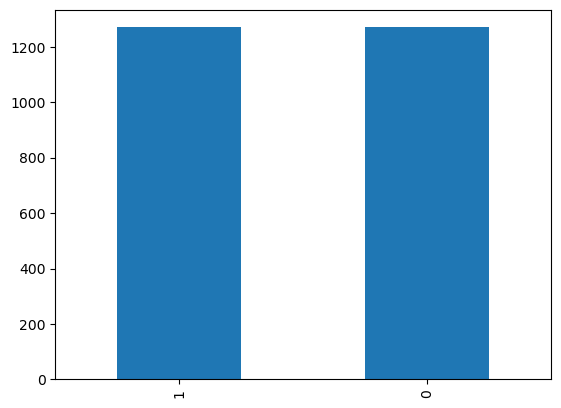

In [4]:
train_df['category'].value_counts().plot.bar()

In [5]:
test_filenames = os.listdir("C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
test_df.head()

,filename,category
0,Autistic.0.jpg,1
1,Autistic.1.jpg,1
2,Autistic.10.jpg,1
3,Autistic.100.jpg,1
4,Autistic.1000.jpg,1


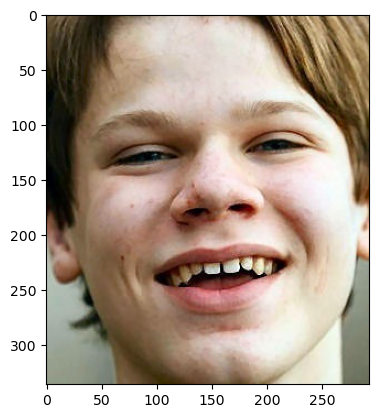

In [7]:
sample = random.choice(filenames)
image = load_img("C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/train/"+sample)
plt.imshow(image)

In [8]:
image_size = 244
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 30
batch_size = 16

pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

C:\ProgramData\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [10]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2286 validated image filenames belonging to 2 classes.


In [11]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 254 validated image filenames belonging to 2 classes.


In [ ]:
#Fit Model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

C:\Users\91809\AppData\Local\Temp\ipykernel_5224\3478809399.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
142/142 [==============================] - 123s 710ms/step - loss: 0.7450 - accuracy: 0.4916 - val_loss: 0.7477 - val_accuracy: 0.4750
Epoch 2/30
142/142 [==============================] - 83s 583ms/step - loss: 0.6946 - accuracy: 0.5185 - val_loss: 0.6895 - val_accuracy: 0.4875
Epoch 3/30
142/142 [==============================] - 82s 580ms/step - loss: 0.6945 - accuracy: 0.4903 - val_loss: 0.6935 - val_accuracy: 0.4750
Epoch 4/30
142/142 [==============================] - 82s 580ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6936 - val_accuracy: 0.4625
Epoch 5/30
142/142 [==============================] - 82s 579ms/step - loss: 0.6933 - accuracy: 0.4868 - val_loss: 0.6934 - val_accuracy: 0.4792
Epoch 6/30
142/142 [==============================] - 83s 580ms/step - loss: 0.6933 - accuracy: 0.4899 - val_loss: 0.6932 - val_accuracy: 0.4917
Epoch 7/30
142/142 [==============================] - 83s 580ms/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6933 - val_a

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

In [ ]:
model.save('vgg19.h5')